In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [ ]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [ ]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [ ]:
df = pd.DataFrame(data,columns=["math","Bio"])

In [ ]:
df

,math,Bio
0,3,4
1,2,8
2,6,9
3,10,12


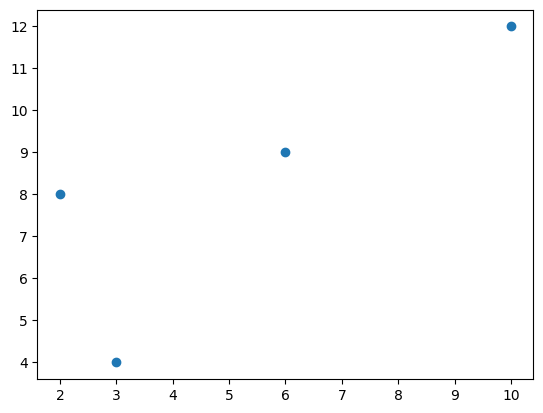

In [ ]:
plt.scatter(df["math"],df["Bio"])

In [ ]:
meanbycol = np.mean(data,axis=0)

In [ ]:
meanbycol

array([5.25, 8.25])

In [ ]:
scaled_data = data-meanbycol

In [ ]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [ ]:
stdbycol = np.std(data,axis=0)

In [ ]:
scaled_data = scaled_data/stdbycol

In [ ]:
## the above process can be done using standardscaler
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit_transform(df)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [ ]:
scaled_data

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [ ]:
scaled_data.T

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

In [ ]:
cov_mat = np.cov(scaled_data.T)

In [ ]:
cov_mat

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

In [ ]:
eig_ = eig(cov_mat)

In [ ]:
eig_vec = eig_[1]
eig_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

In [ ]:
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [ ]:
eig_vec.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [ ]:
df1 = pd.DataFrame(data=pca.fit_transform(scaled_data),columns=['PC1','PC2'])

In [ ]:
df1

,PC1,PC2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [ ]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [ ]:
# so pc1 has more information than pc2

In [ ]:
sorted(pca.explained_variance_ratio_)

[0.09647880802086492, 0.903521191979135]

In [ ]:
sorted(pca.explained_variance_ratio_,reverse=True)

[0.903521191979135, 0.09647880802086492]

In [ ]:
sum(sorted(pca.explained_variance_ratio_,reverse=True)[:1])*100

90.35211919791351

In [ ]:
var = pca.explained_variance_ratio_

In [ ]:
var

array([0.90352119, 0.09647881])

In [ ]:
np.cumsum(var) # cummulative sum

array([0.90352119, 1.        ])

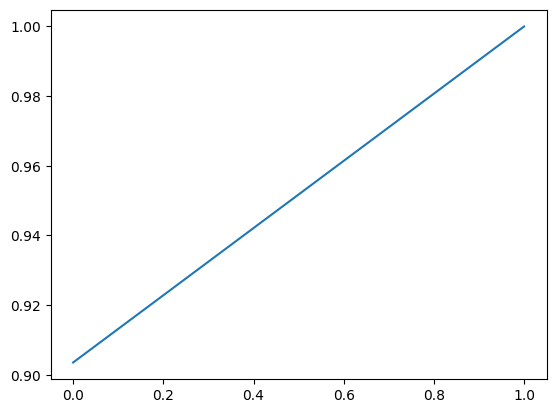

In [ ]:
plt.plot(np.cumsum(var))
plt.show()